In [1]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [2]:
def K_Means(X, n_clusters, max_iter = 300):
    distances = np.zeros((len(data), n_clusters))
    init_centres_idx = random.sample(range(0, len(X)), n_clusters)
    centres = X[init_centres_idx]
    for i in range(max_iter):
        for j in range(n_clusters):
            distances[:,j] = np.sqrt(np.sum((X - centres[j])**2, axis = 1))
        assignments = np.argmin(distances, axis = 1)
        prev_centres = centres
        for j in range(n_clusters):
            centres[j,:] = np.sum(X[assignments == j], axis = 0)/np.sum(assignments == j) 
    return centres, assignments

In [3]:
def visualize(X, assignments):
    import matplotlib.pyplot as plt
     
    plt.subplots()
    plt.scatter(X[:,0], X[:,1])
    plt.title('Before K_Means')
    
    plt.subplots()
    plt.scatter(X[:,0], X[:,1], c=assignments)
    for i in range(len(np.unique(assignments))):
        plt.scatter(centres[i,0], centres[i,1], marker='x', color = 'red', s = 90)
    plt.title('After K_Means')
   

In [4]:
data = pd.read_csv('D:\\Moradkhani\\datasets\\clustering\\aggregation.txt', header=None, delimiter='\t')

In [5]:
data.head()

,0,1,2
0,15.55,28.65,2
1,14.90,27.55,2
2,14.45,28.35,2
3,14.15,28.80,2
4,13.75,28.05,2


In [6]:
X = np.array(data[[0,1]])

In [9]:
centres, assignments = K_Means(X, n_clusters=7, max_iter=100)

In [10]:
kmeans = KMeans(n_clusters=7).fit(X)

In [11]:
pred = kmeans.predict(X)

Text(0.5, 1.0, 'sklearn K_Means')

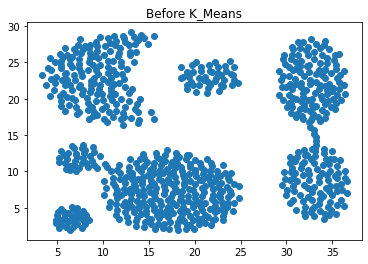

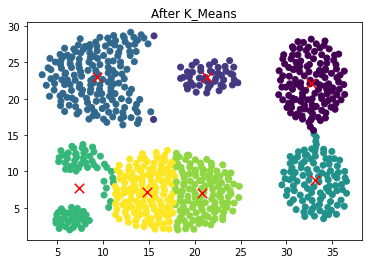

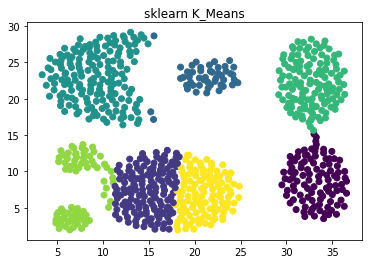

In [12]:
visualize(X, assignments=assignments)

plt.subplots()
plt.scatter(X[:,0], X[:,1], c = pred)
plt.title('sklearn K_Means')